In [1]:
import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt

In [6]:
data = np.load('/Users/f0s03xp/Desktop/Compression Algorithm/baler/workspaces/CFD_workspace/data/CFD_animation.npz')['data']

In [8]:
test_data = data[0]

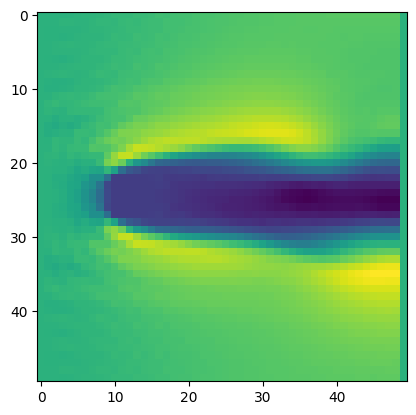

In [10]:
plt.imshow(test_data)

In [13]:
max_val = np.amax(test_data)
min_val = np.amin(test_data)
print(max_val, min_val)

0.044484999030828476 -0.009778629057109356


In [14]:
max_val = np.amax(data)
min_val = np.amin(data)
print(max_val, min_val)

0.04761887714266777 -0.01114225760102272


In [15]:
data_mnist = np.load('workspaces/MNIST_workspace/data/MNIST_project_data.npz')['data']

In [16]:
test_mnist = data_mnist[0]
max_val = np.amax(test_mnist)
min_val = np.amin(test_mnist)
print(max_val, min_val)

255 0


In [17]:
test_mnist = data_mnist[0]
max_val = np.amax(data_mnist)
min_val = np.amin(data_mnist)
print(max_val, min_val)

255 0


In [22]:
def normalize(data, custom_norm: bool):
    """This function scales the data to be in the range [0,1], based on the Min Max normalization method. It finds
    the minimum and maximum values of each column and computes the values according to: x_norm = (x - x_min) / (x_max
    - x_min).

    Args: data (ndarray): A dataset of type `ndarray`. custom_norm (boolean): If you want to do Min Max normalization
    or any custom normalization. Custom normalization is not supported at the moment.

    Returns: ndarray: If not custom_norm: Input data where every column is scaled to be in the range [0,
    1]. Otherwise, the input data is returned
    """
    data = np.array(data)
    if custom_norm:
        pass
    elif not custom_norm:
        true_min = np.min(data)
        true_max = np.max(data)
        feature_range = true_max - true_min
        data = [((i - true_min) / feature_range) for i in data]
        data = np.array(data)
    return data

### applied to cfd data

data = np.load('/Users/f0s03xp/Desktop/Compression Algorithm/baler/workspaces/CFD_workspace/data/CFD_animation.npz')['data']

data_cust_norm_false = np.apply_along_axis(
        normalize, axis=0, arr=data, custom_norm=False
    )

data = np.load('/Users/f0s03xp/Desktop/Compression Algorithm/baler/workspaces/CFD_workspace/data/CFD_animation.npz')['data']

data_cust_norm_true = np.apply_along_axis(
    normalize, axis=0, arr=data, custom_norm=True
)

### applied to mnist data
data_mnist = np.load('/Users/f0s03xp/Desktop/Compression Algorithm/baler/workspaces/MNIST_workspace/data/MNIST_project_data.npz')['data']

data_mnist_norm_false = np.apply_along_axis(
        normalize, axis=0, arr=data_mnist, custom_norm=False
    )

data_mnist = np.load('/Users/f0s03xp/Desktop/Compression Algorithm/baler/workspaces/MNIST_workspace/data/MNIST_project_data.npz')['data']

data_mnist_norm_true = np.apply_along_axis(
    normalize, axis=0, arr=data_mnist, custom_norm=True
)

/var/folders/gz/_208ch3n5gq72cwtgc1y0ghm0000gq/T/ipykernel_73979/1838347309.py:19: RuntimeWarning: invalid value encountered in scalar divide
  data = [((i - true_min) / feature_range) for i in data]


In [23]:
def get_min_max(data):
    max_value = np.amax(data)
    min_value = np.amin(data)
    print("max min for the respective data sources")
    print(max_value, min_value)

get_min_max(data_cust_norm_false)
get_min_max(data_cust_norm_true)
get_min_max(data_mnist_norm_true)
get_min_max(data_mnist_norm_false)

max min for the respective data sources
nan nan
max min for the respective data sources
0.04761887714266777 -0.01114225760102272
max min for the respective data sources
255 0
max min for the respective data sources
nan nan


In [24]:
data_mnist = np.load('/Users/f0s03xp/Desktop/Compression Algorithm/baler/workspaces/MNIST_workspace/data/MNIST_project_data.npz')['data']

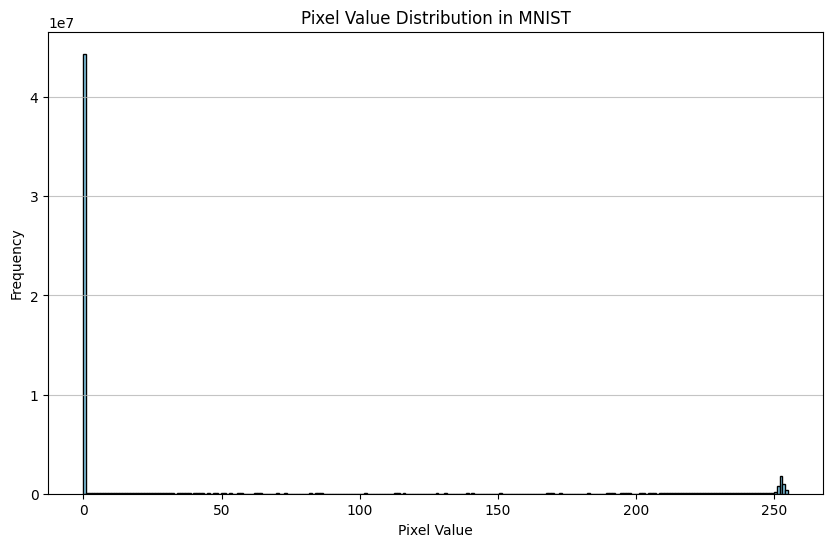

In [26]:
pixel_values = data_mnist.flatten()

plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=256, range=(0, 255), color='skyblue', edgecolor='black')  # 256 bins for 8-bit grayscale
plt.title('Pixel Value Distribution in MNIST')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
data_encoded = np.load('/Users/f0s03xp/Desktop/Compression Algorithm/baler/workspaces/MNIST_workspace/MNIST_project/output/compressed_output/compressed.npz')['data']

pixel_values = data_encoded.flatten()

In [30]:
print('min and max values for the encoded: ')
print('max: ', np.amax(pixel_values), 'min: ', np.amin(pixel_values))

min and max values for the encoded: 
max:  1451.5382 min:  -1484.109


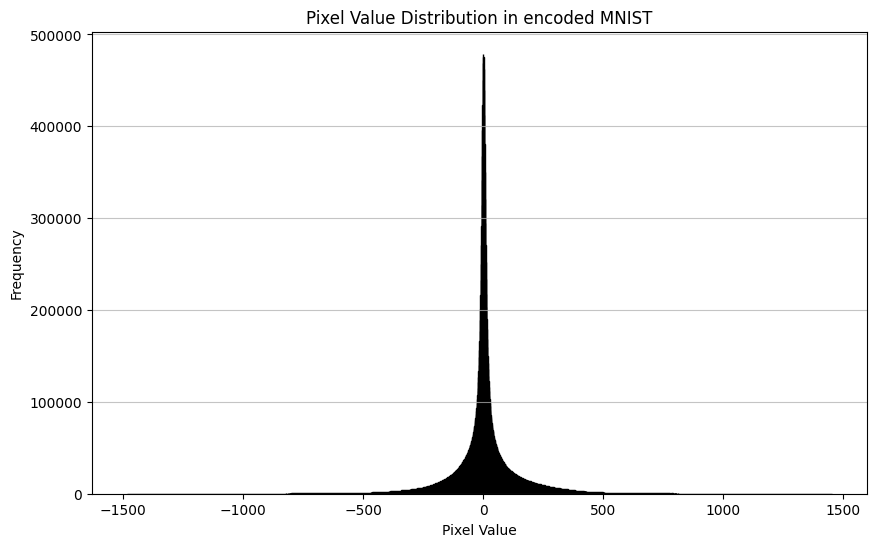

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=3000, range=(np.amin(pixel_values), np.amax(pixel_values)), color='skyblue', edgecolor='black')
plt.title('Pixel Value Distribution in encoded MNIST')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [39]:
data_reconstructed = np.load('/Users/f0s03xp/Desktop/Compression Algorithm/baler/workspaces/MNIST_workspace/MNIST_project/output/decompressed_output/decompressed.npz')['data']

pixel_values = data_reconstructed.flatten()

In [40]:
### min and max values for reconstructed data

print('min and max values for the encoded: ')
print('max: ', np.amax(pixel_values), 'min: ', np.amin(pixel_values))

min and max values for the encoded: 
max:  103661.62 min:  -31701.74


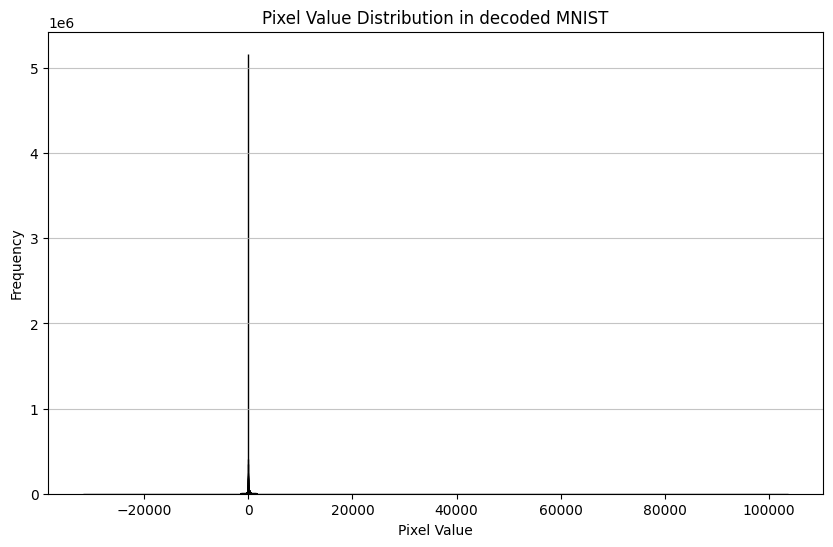

In [38]:

from math import ceil
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=ceil(abs(np.amin(pixel_values))+abs(np.amax(pixel_values))), range=(np.amin(pixel_values), np.amax(pixel_values)), color='skyblue', edgecolor='black')
plt.title('Pixel Value Distribution in decoded MNIST')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()